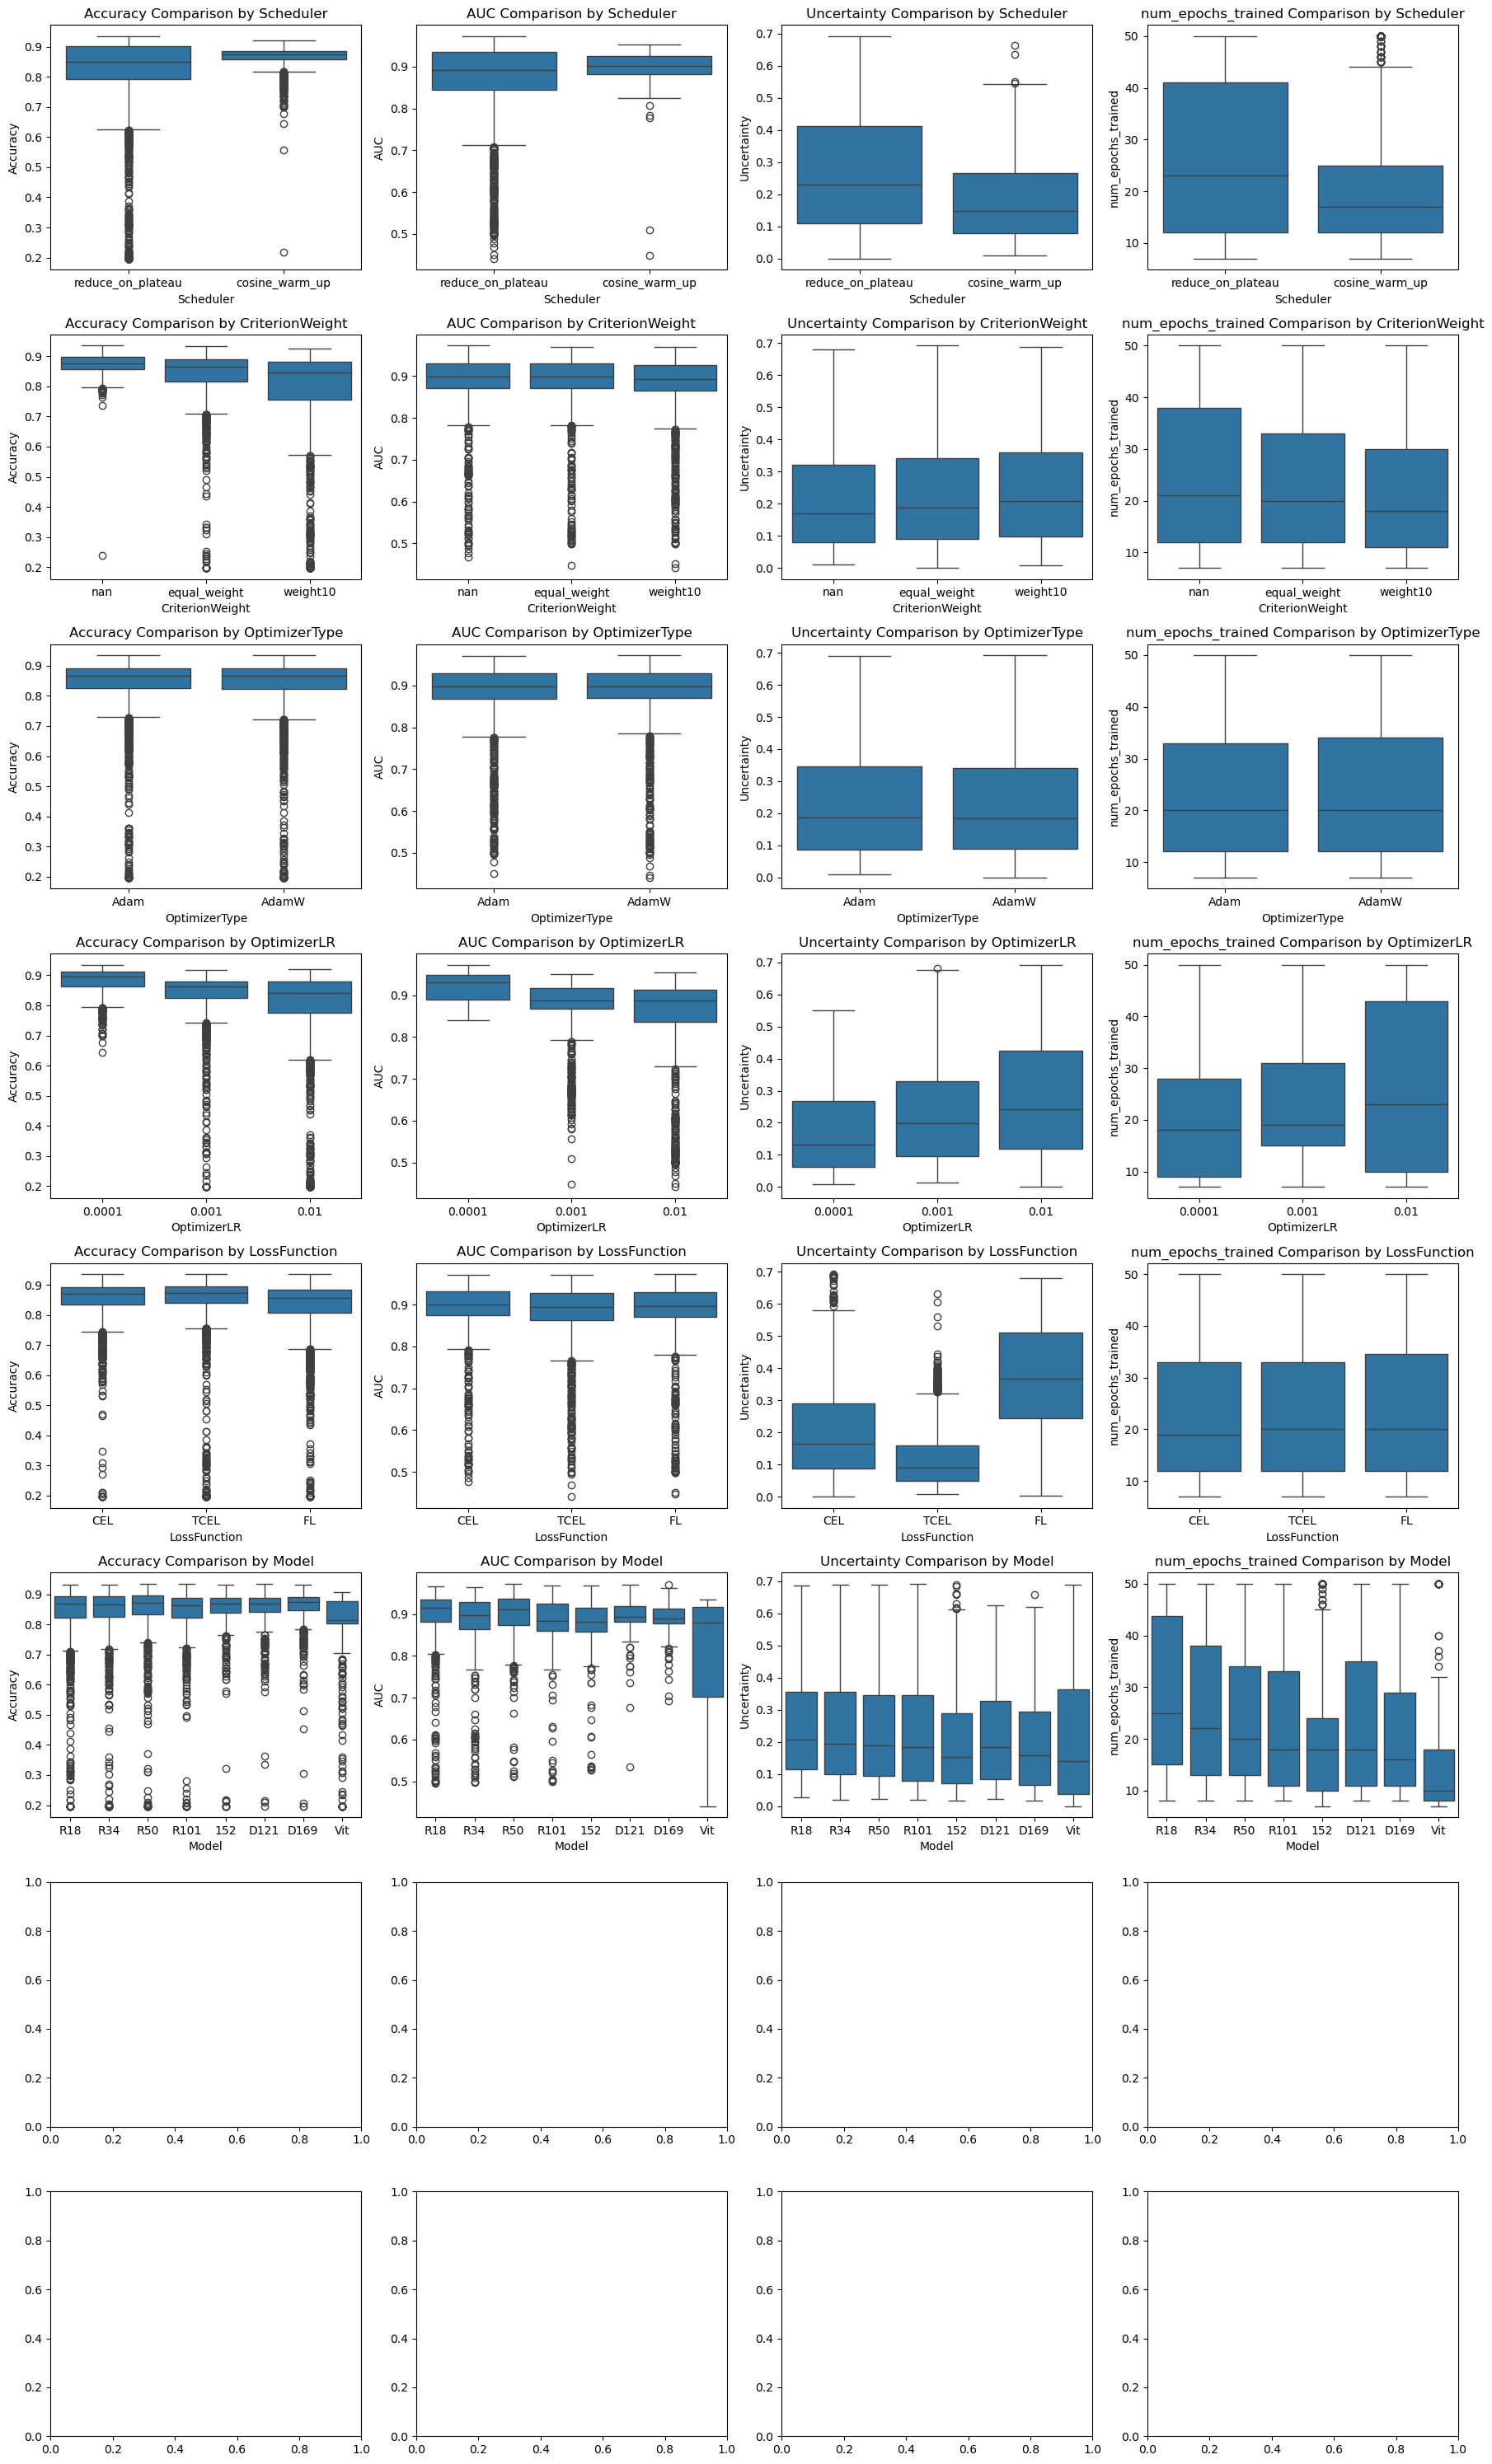

In [1]:
import pandas as pd
import matplotlib.ticker as ticker

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('/data/mdaouk/Repo2/analysis/model_evaluation_detailed.csv')
df['CriterionWeight'] = df['CriterionWeight'].astype(str)
# ... [Your loop code that populates detailed_df] ...

# Once all metrics are collected, create the box plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=8, ncols=4, figsize = (18,30))

df = df[df['LossFunction'] != 'RCEL']
#for i, hyperparameter in enumerate(['ImageInput','Augmentation','Scheduler','CriterionWeight','OptimizerType','OptimizerLR','LossFunction','Model']):
for i, hyperparameter in enumerate(['Scheduler','CriterionWeight','OptimizerType','OptimizerLR','LossFunction','Model']):
    for j, metric in enumerate(['Accuracy','AUC','Uncertainty','num_epochs_trained']):  
        sns.boxplot(x=hyperparameter, y=metric, data=df, ax=axes[i, j])
        axes[i, j].set_title(f"{metric} Comparison by {hyperparameter}")
        axes[i, j].set_xlabel(f"{hyperparameter}")
        axes[i, j].set_ylabel(f"{metric}")
        if j < 3:
            axes[i, j].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        

# Adjust layout for clarity
plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd
import matplotlib.ticker as ticker

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('/data/mdaouk/Repo2/analysis/model_evaluation_detailed.csv')
df['CriterionWeight'] = df['CriterionWeight'].astype(str)
# ... [Your loop code that populates detailed_df] ...

# Once all metrics are collected, create the box plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=8, ncols=4, figsize = (18,30))

df = df[df['LossFunction'] != 'RCEL']
#for i, hyperparameter in enumerate(['ImageInput','Augmentation','Scheduler','CriterionWeight','OptimizerType','OptimizerLR','LossFunction','Model']):
for i, hyperparameter in enumerate(['Scheduler','CriterionWeight','OptimizerType','OptimizerLR','LossFunction','Model']):
    for j, metric in enumerate(['Accuracy','AUC','Uncertainty','num_epochs_trained']):  
        sns.boxplot(x=hyperparameter, y=metric, data=df, ax=axes[i, j])
        axes[i, j].set_title(f"{metric} Comparison by {hyperparameter}")
        axes[i, j].set_xlabel(f"{hyperparameter}")
        axes[i, j].set_ylabel(f"{metric}")
        if j < 3:
            axes[i, j].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        

# Adjust layout for clarity
plt.tight_layout()
plt.show()




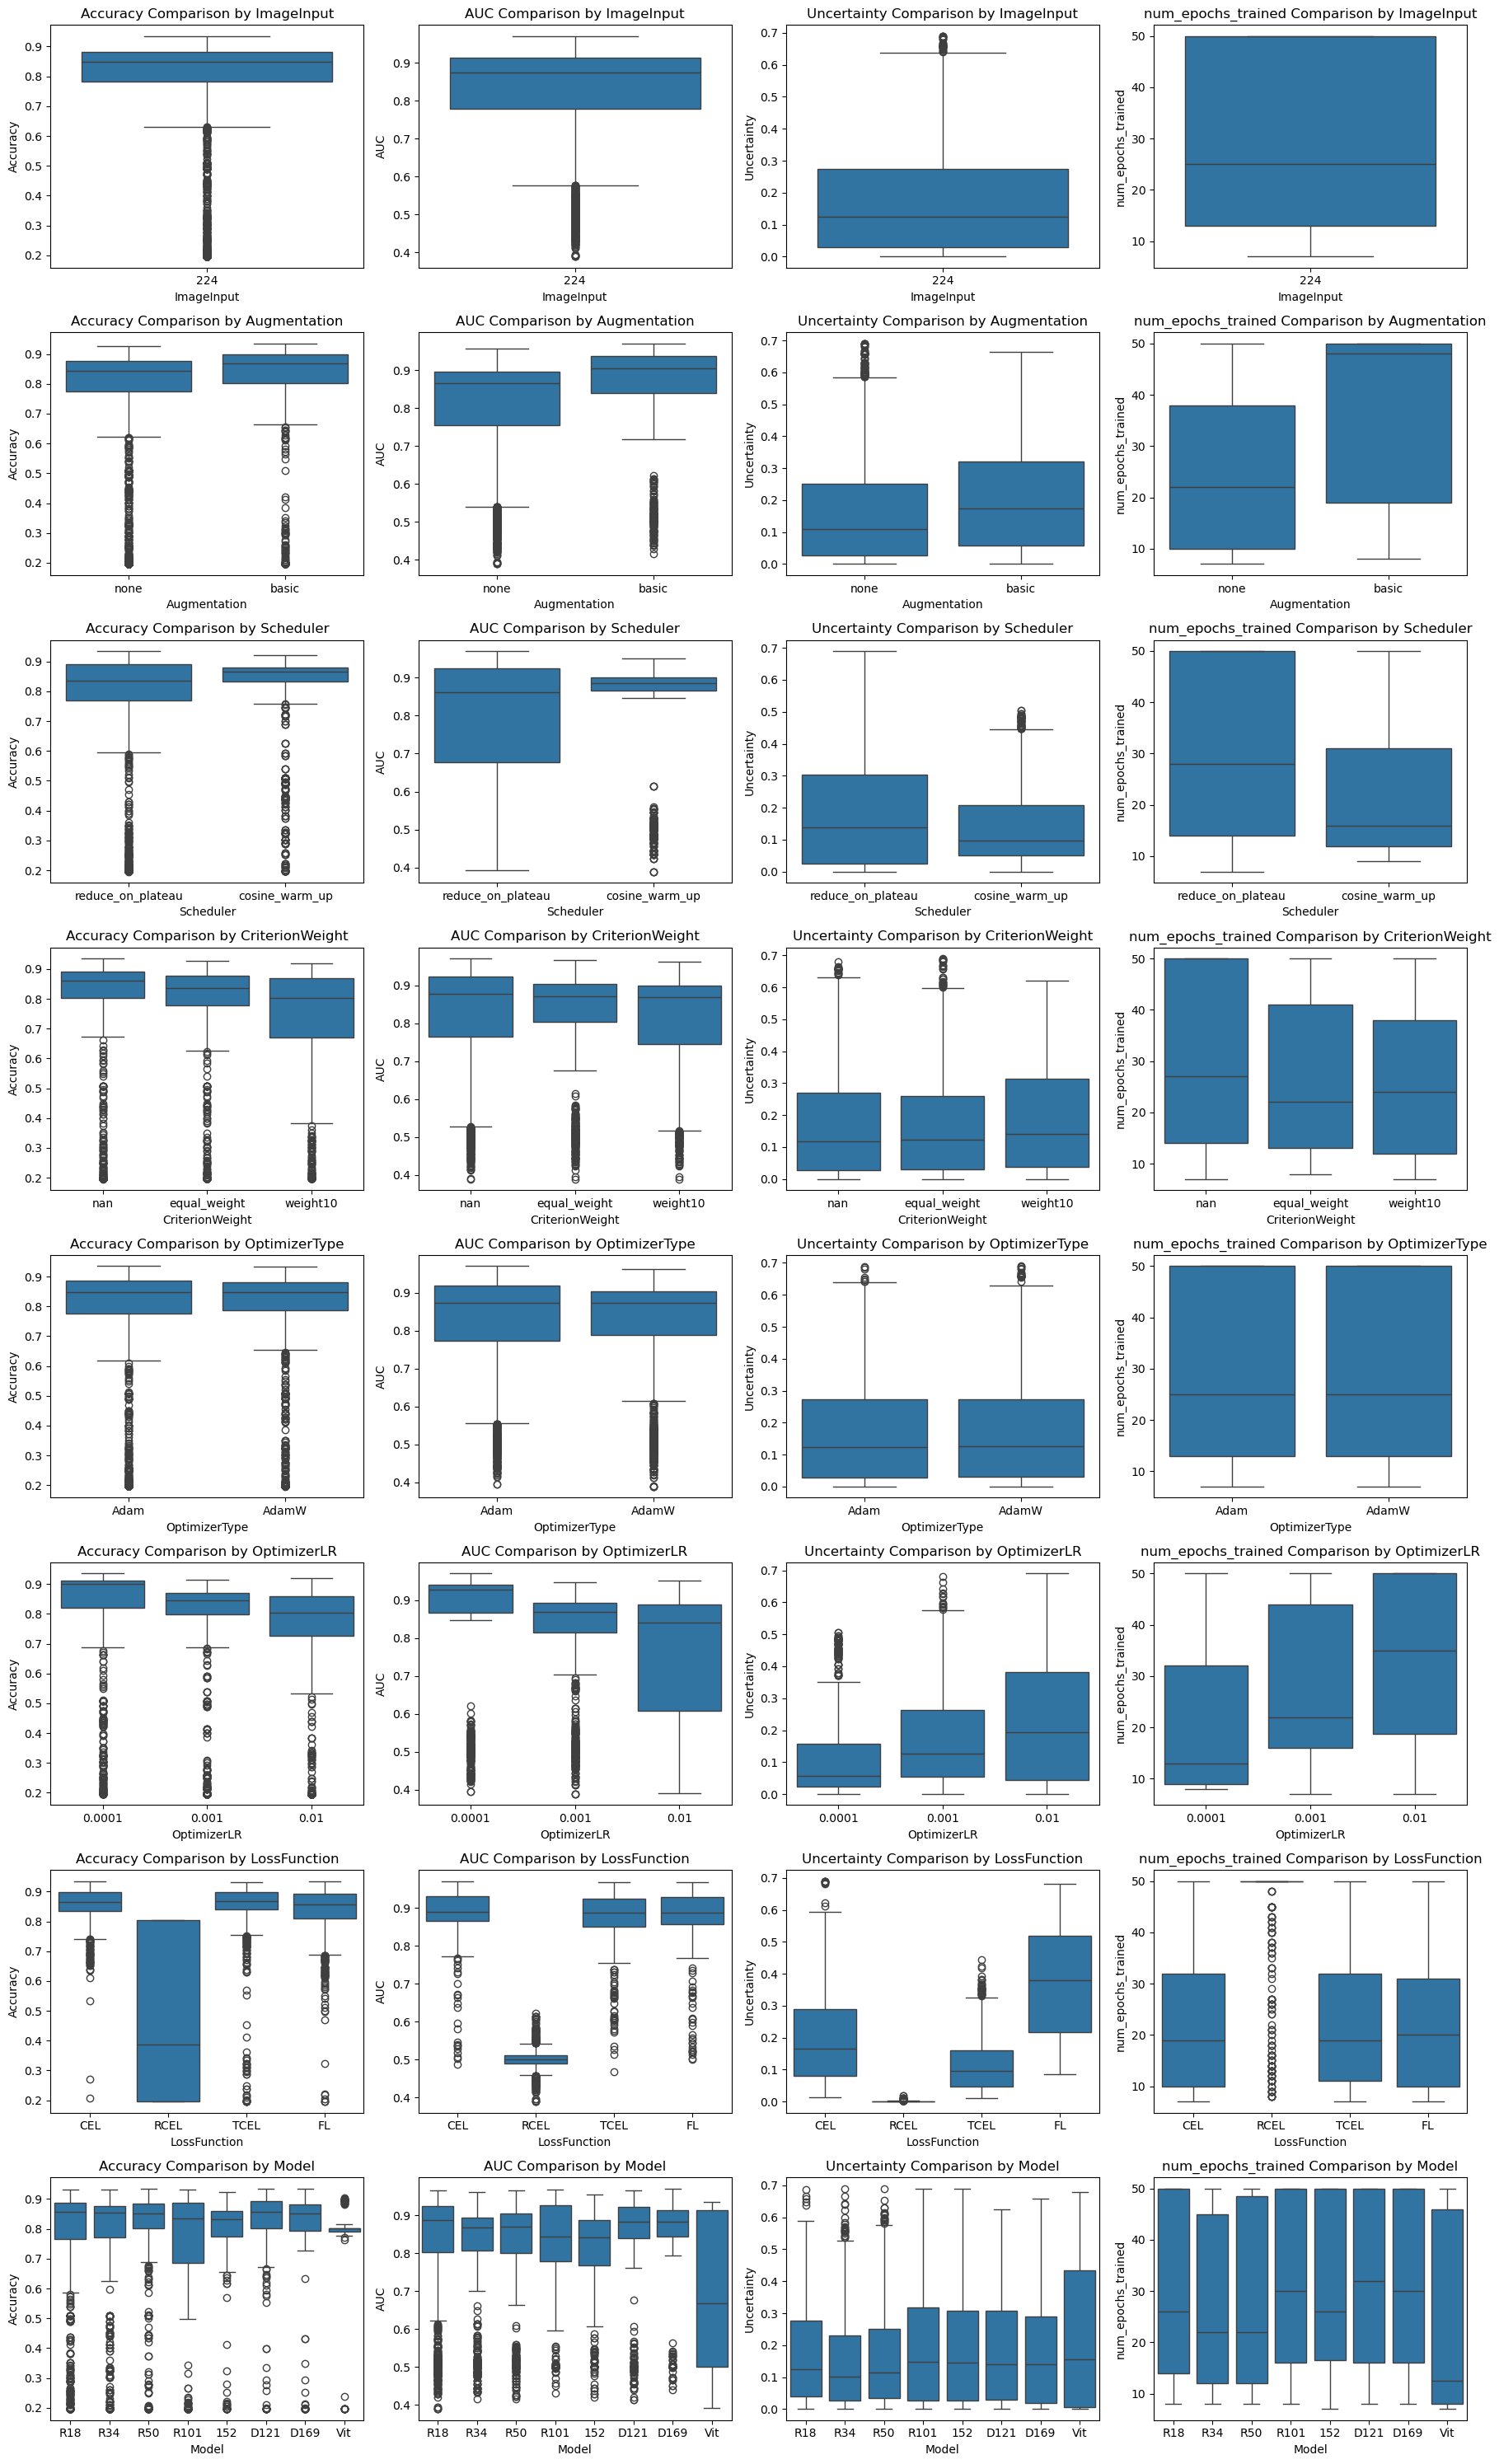

In [7]:
# Filter the DataFrame to exclude rows with LossFunction == 'ReverseCrossEntropy'
filtered_df1 = df[df['Model'].isin(['R18', 'R34'])]
filtered_df = filtered_df1[filtered_df1['LossFunction'] != 'RCEL']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=8, ncols=4, figsize = (18,30))

for i, hyperparameter in enumerate(['ImageInput','Augmentation','Scheduler','CriterionWeight','OptimizerType','OptimizerLR','LossFunction','Model']):
    for j, metric in enumerate(['Accuracy','AUC','Uncertainty','num_epochs_trained']):  
        sns.boxplot(x=hyperparameter, y=metric, data=df, ax=axes[i, j])
        axes[i, j].set_title(f"{metric} Comparison by {hyperparameter}")
        axes[i, j].set_xlabel(f"{hyperparameter}")
        axes[i, j].set_ylabel(f"{metric}")
        if j < 3:
            axes[i, j].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        

# Adjust layout for clarity
plt.tight_layout()
plt.show()

In [7]:
filtered_df['LossFunction']

0              CrossEntropyLoss
1              CrossEntropyLoss
2              CrossEntropyLoss
3              CrossEntropyLoss
4              CrossEntropyLoss
                 ...           
2523           CrossEntropyLoss
2524    ReverseCrossEntropyLoss
2525    ReverseCrossEntropyLoss
2526    ReverseCrossEntropyLoss
2527    ReverseCrossEntropyLoss
Name: LossFunction, Length: 2528, dtype: object

In [3]:
import json

base_path = (
    f"/data/mdaouk/Repo2/metrics/image_size_224/augmentation_none/"
    f"scheduler_type_reduce_on_plateau/criterion_weight_None/"
    f"optimizer_type_Adam/optimizer_lr_0.01"
)
# Construct the full metric file path for the current configuration
metric_path = f"{base_path}/loss_function_CrossEntropyLoss/model_Resnet18/training_dict_fold5.json"

In [4]:
with open(metric_path, 'r') as f:
    try:
        data = json.load(f)
    except json.decoder.JSONDecodeError as e:
        print(f"Error decoding JSON in {metric_path}: {e}")

In [5]:
data.keys()

dict_keys(['fold_loss', 'train_accuracies', 'val_losses', 'val_accuracies', 'precisions', 'recalls', 'f1_scores', 'aucs', 'confusion_matrices', 'gradient_norms', 'epoch_times', 'num_epochs_trained', 'all_testing_dict'])

In [15]:
data['fold_loss']

41

/tmp/ipykernel_1032854/182104158.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_1032854/182104158.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_1032854/182104158.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_1032854/182104158.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


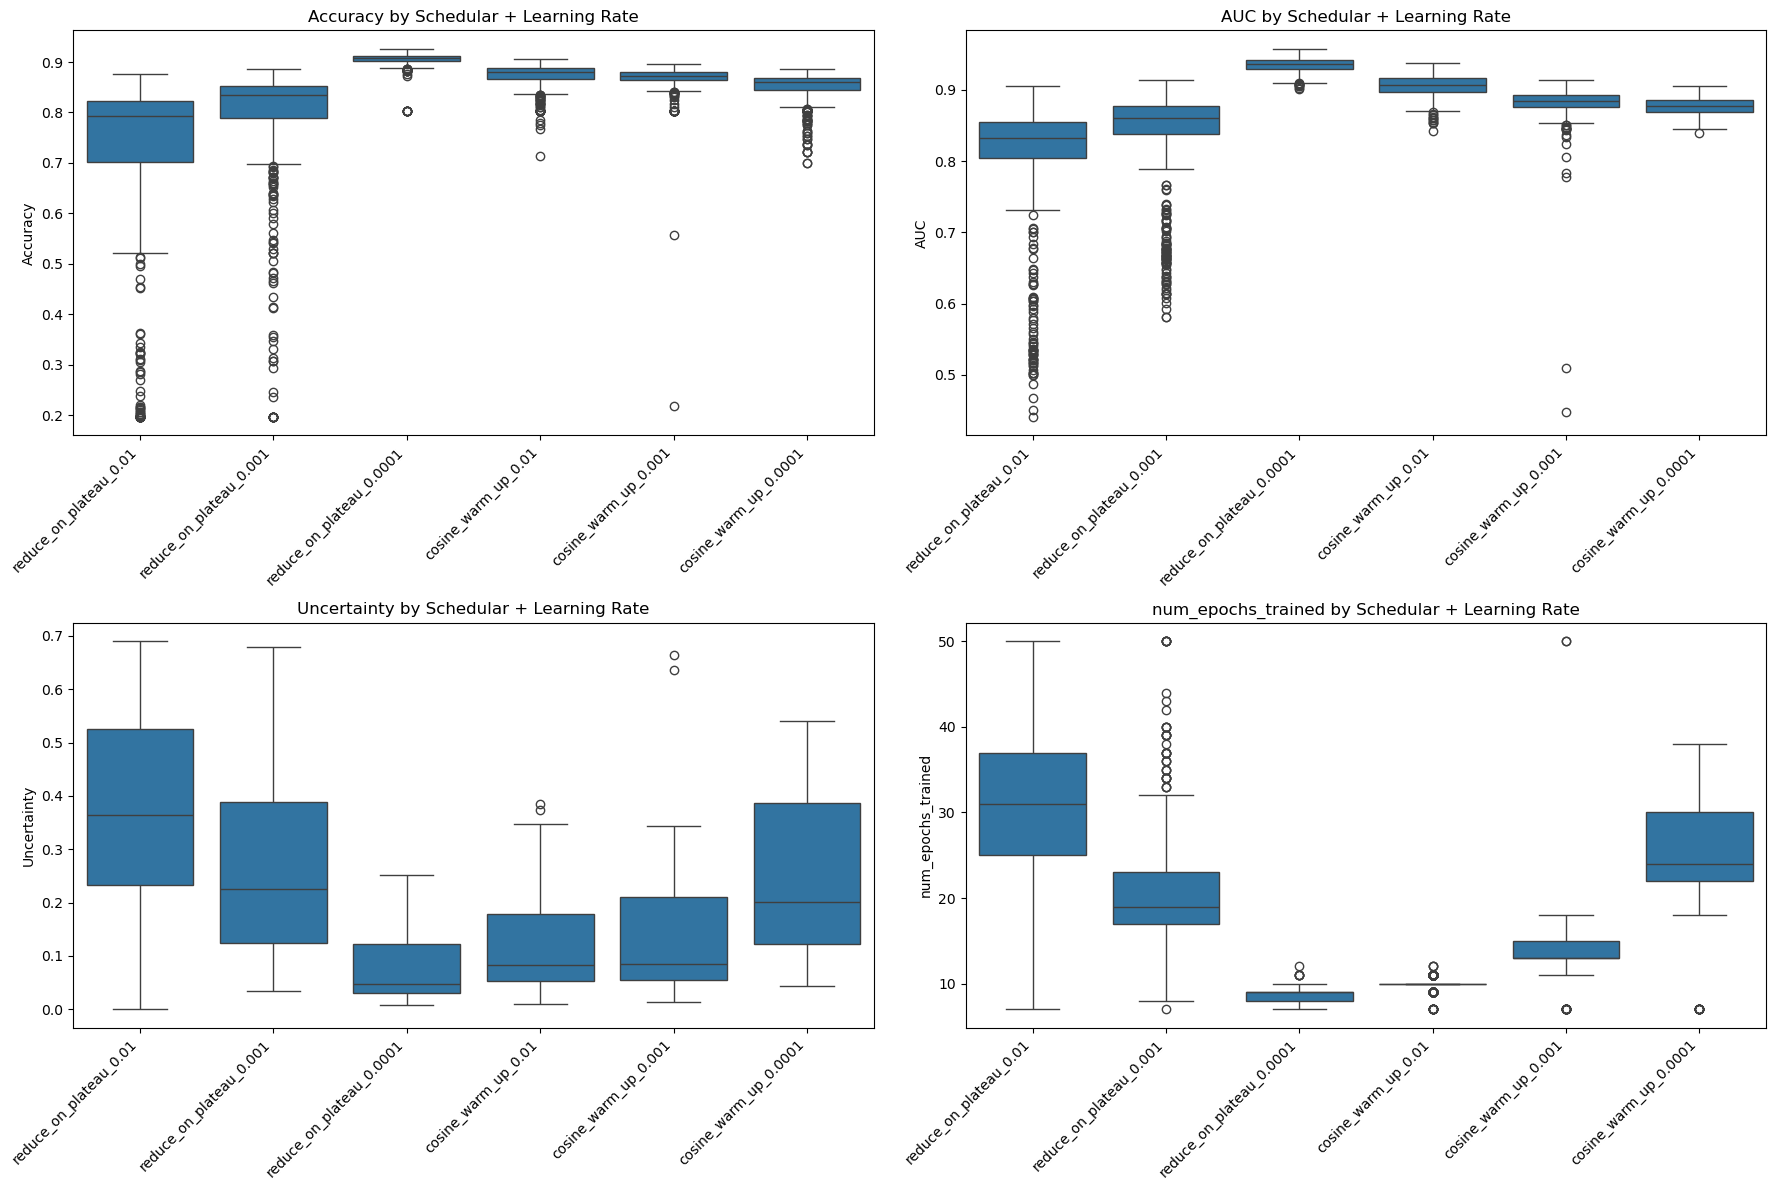

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your complete DataFrame; create a copy called df_filter.
filtered_df = df.copy()
filtered_df = filtered_df[filtered_df['LossFunction'] != 'RCEL']
filtered_df = filtered_df[filtered_df['Augmentation'] == 'none']
# Create a new column that combines Scheduler, OptimizerType, and OptimizerLR
# Note: Convert OptimizerLR to string so the concatenation works as expected.
filtered_df['Hyperparam'] = (
    filtered_df['Scheduler'] + '_' +
    filtered_df['OptimizerLR'].astype(str)
)

# Define the list of metrics to plot
metrics = ['Accuracy', 'AUC', 'Uncertainty', 'num_epochs_trained']

# Create a 2x2 grid for the box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    sns.boxplot(x='Hyperparam', y=metric, data=filtered_df, ax=ax)
    ax.set_title(f"{metric} by Schedular + Learning Rate")
    ax.set_xlabel("")
    ax.set_ylabel(metric)
    # Rotate x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


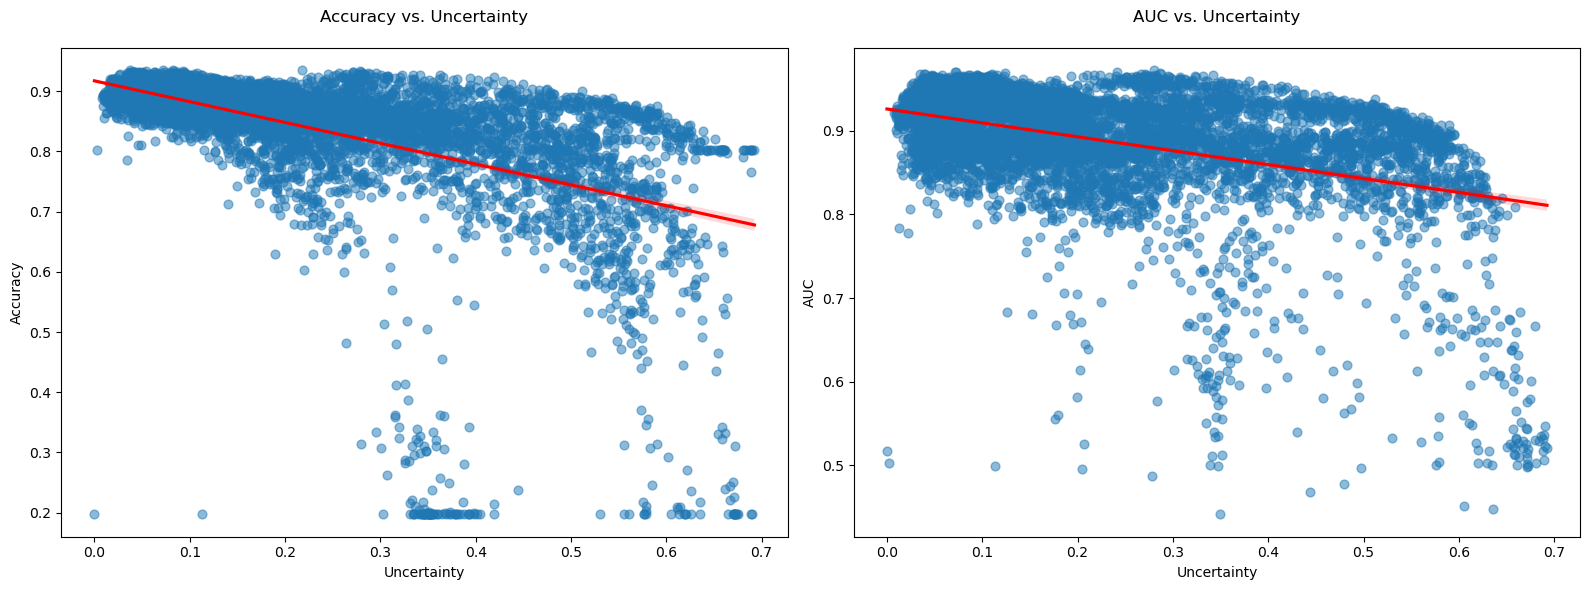

MissingDataError: exog contains inf or nans

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import statsmodels.api as sm

# --- 1) Prepare your filtered DataFrame ---
filtered_df = df[df['LossFunction'] != 'RCEL'].copy()

# --- 2) Scatter + regression‐line plots ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
for ax, metric in zip(axes, ['Accuracy', 'AUC']):
    x = filtered_df['Uncertainty']
    y = filtered_df[metric]

    # scatter + best‐fit line
    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.5, 's':40}, line_kws={'color':'red'})

    # compute linear fit stats
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ax.set_title(f"{metric} vs. Uncertainty\n"
                 )
    ax.set_xlabel("Uncertainty")
    ax.set_ylabel(metric)

plt.tight_layout()
plt.show()


# --- 3) Bar‐chart of slope coefficients (“coefficient plot”) ---
# Fit simple OLS(model) to get confidence intervals, if you like:
coefs, ci_lower, ci_upper = [], [], []
for metric in ['Accuracy', 'AUC']:
    X = sm.add_constant(filtered_df['Uncertainty'])
    model = sm.OLS(filtered_df[metric], X).fit()
    coefs.append(model.params['Uncertainty'])
    lower, upper = model.conf_int().loc['Uncertainty']
    ci_lower.append(coefs[-1] - lower)
    ci_upper.append(upper - coefs[-1])

coef_df = pd.DataFrame({
    'Metric': ['Accuracy', 'AUC'],
    'Slope': coefs,
    'err_low': ci_lower,
    'err_high': ci_upper
})

fig, ax = plt.subplots(figsize=(6, 4))
# horizontal errorbars
ax.errorbar(coef_df['Slope'], coef_df['Metric'],
            xerr=[coef_df['err_low'], coef_df['err_high']],
            fmt='o', color='C2', ecolor='C2', capsize=5)
ax.axvline(0, color='gray', linestyle='--')
ax.set_xlabel("Slope coefficient (ΔMetric / ΔUncertainty)")
ax.set_title("Regression Coefficients of Metric vs. Uncertainty")

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


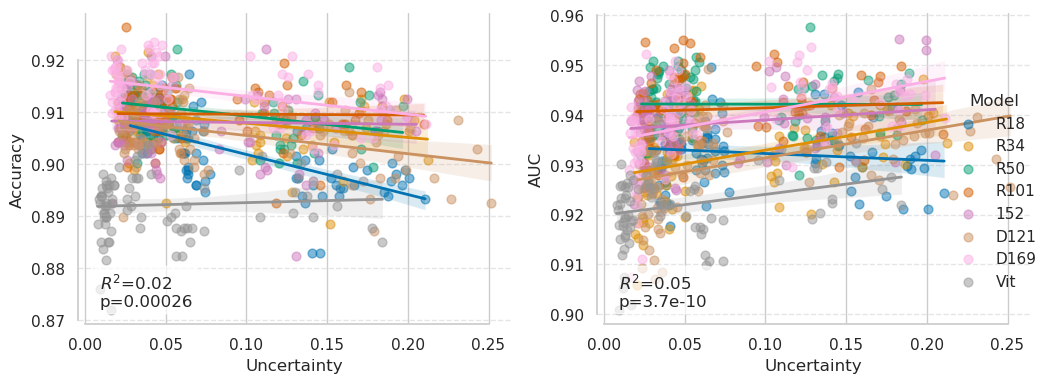

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 1) Filter *first*, then dropna on the exact columns you need
df2 = (
    df[
        (df['LossFunction'] != 'RCEL') &
        (df['Scheduler'] == 'reduce_on_plateau') &
        (df['OptimizerLR'] == 0.0001) &
        (df['Augmentation'] == 'none')
    ]
    .dropna(subset=['Uncertainty','Accuracy','AUC'])
    .copy()
)

# 2) Melt into long form so we can facet over Metric
melt = df2.melt(
    id_vars=['Uncertainty','Model'],
    value_vars=['Accuracy','AUC'],
    var_name='Metric',
    value_name='Value'
)

# 3) Draw two panels with lmplot
sns.set_theme(style="whitegrid", palette="colorblind")
g = sns.lmplot(
    data=melt,
    x="Uncertainty", y="Value",
    hue="Model",               # color by R18 vs R34
    col="Metric",              # one facet for Accuracy, one for AUC
    sharey=False,
    height=4, aspect=1.2,
    scatter_kws={"alpha":0.5, "s":40},
    line_kws={"linewidth":2},
    robust=True                # downweight outliers in the regression
)

# 4) Compute and annotate R² & p‑value in each facet
for ax, metric in zip(g.axes.flat, ["Accuracy","AUC"]):
    sub = df2.dropna(subset=["Uncertainty", metric])
    slope, intercept, r_value, p_value, stderr = linregress(sub["Uncertainty"], sub[metric])
    ax.text(
        0.05, 0.05,
        f"$R^2$={r_value**2:.2f}\np={p_value:.2g}",
        transform=ax.transAxes,
        va="bottom", ha="left",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7)
    )
    ax.set_title("")              # remove duplicate facet title
    ax.set_ylabel(metric)         # move metric into y‑axis
    ax.set_xlabel("Uncertainty")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# 5) Tidy up legend & layout
g._legend.set_title("Model")
sns.despine(trim=True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_960934/849945464.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_960934/849945464.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_960934/849945464.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_960934/849945464.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


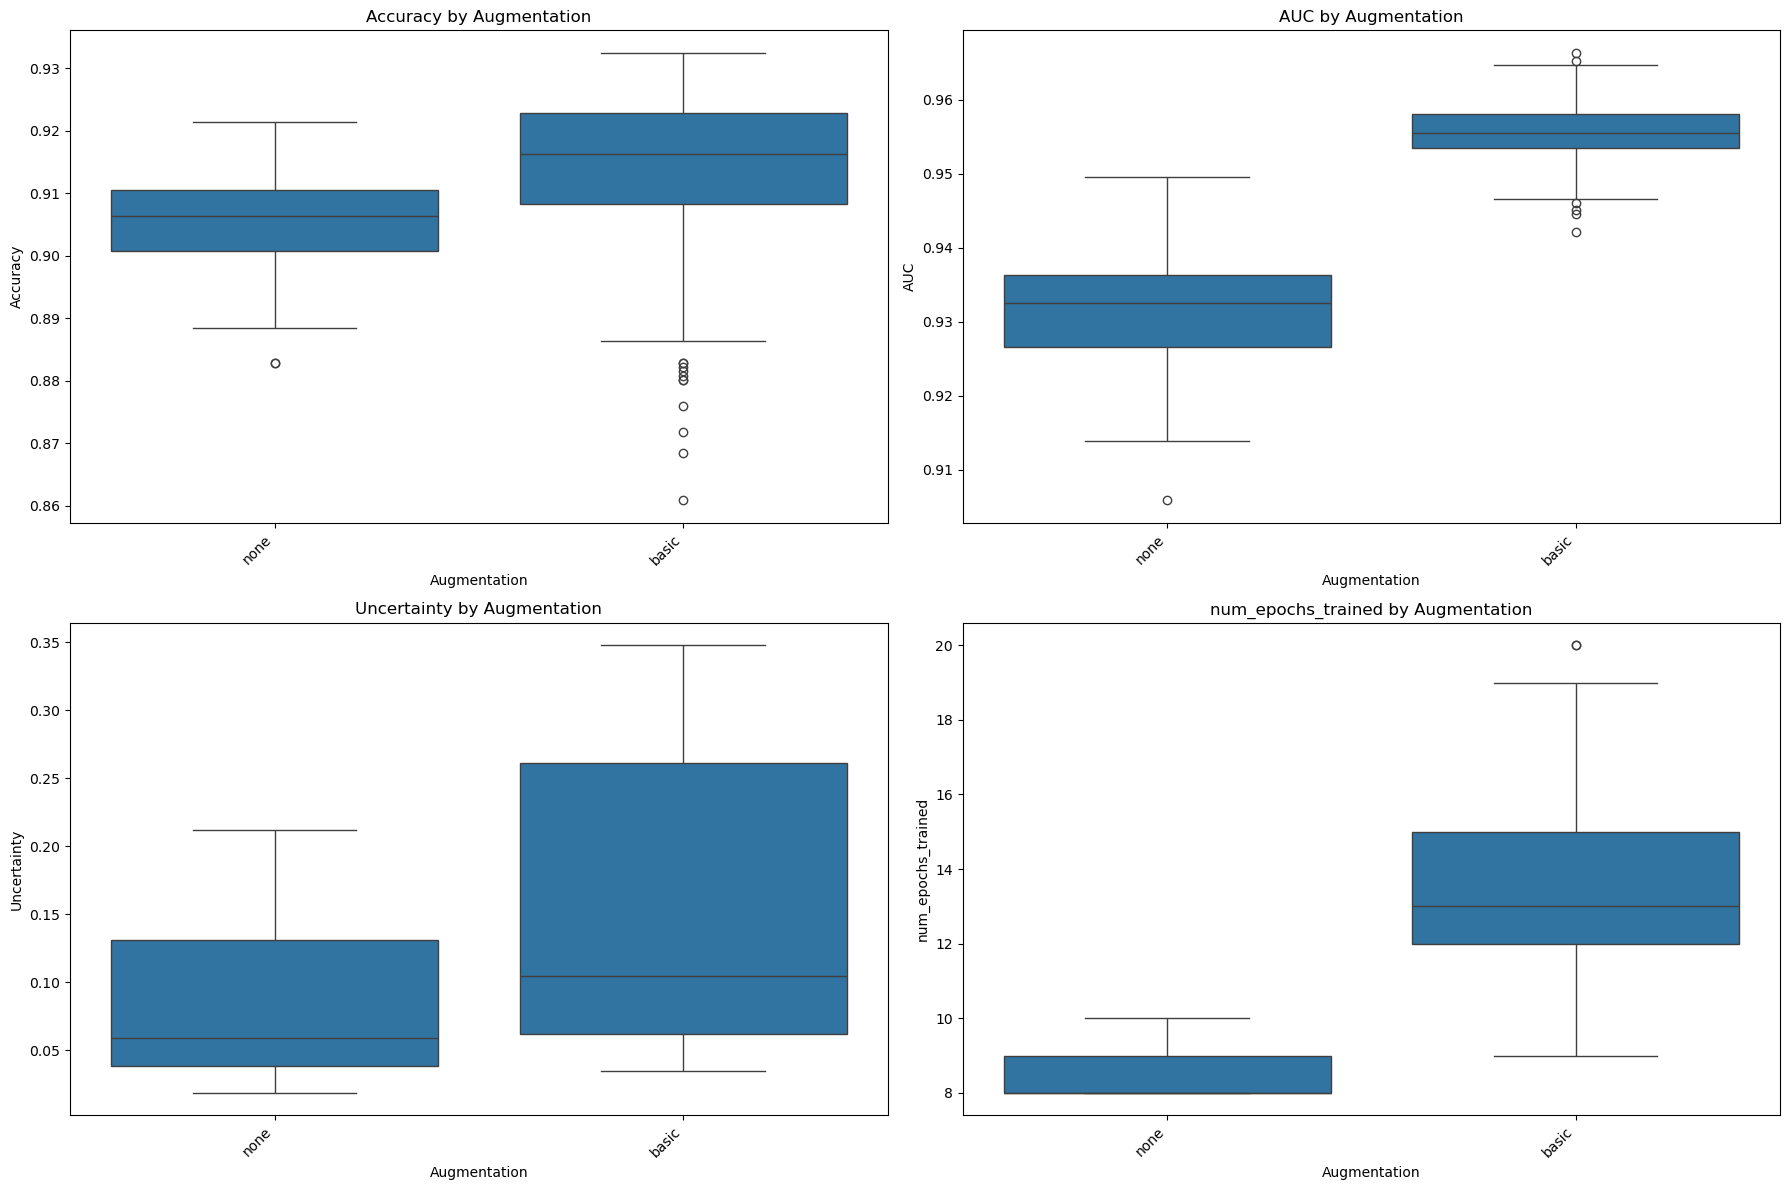

In [8]:
# Filter the DataFrame to exclude rows with LossFunction == 'ReverseCrossEntropy'
filtered_df1 = df[df['Model'].isin(['R18', 'R34'])]
filtered_df = filtered_df1[filtered_df1['LossFunction'] != 'RCEL']
filtered_df = filtered_df[filtered_df['Scheduler'] == 'reduce_on_plateau']
filtered_df = filtered_df[filtered_df['OptimizerLR'] == 0.0001]
filtered_df = filtered_df[filtered_df['Augmentation'] != 'advanced']

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your complete DataFrame; create a copy called df_filter.
filtered_df = filtered_df.copy()
# Create a new column that combines Scheduler, OptimizerType, and OptimizerLR
# Note: Convert OptimizerLR to string so the concatenation works as expected.
filtered_df['Hyperparam'] = (
    filtered_df['Augmentation']
)

# Define the list of metrics to plot
metrics = ['Accuracy', 'AUC', 'Uncertainty', 'num_epochs_trained']

# Create a 2x2 grid for the box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    sns.boxplot(x='Hyperparam', y=metric, data=filtered_df, ax=ax)
    ax.set_title(f"{metric} by Augmentation")
    ax.set_xlabel("Augmentation")
    ax.set_ylabel(metric)
    # Rotate x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_1172944/3149833586.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_1172944/3149833586.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_1172944/3149833586.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_1172944/3149833586.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


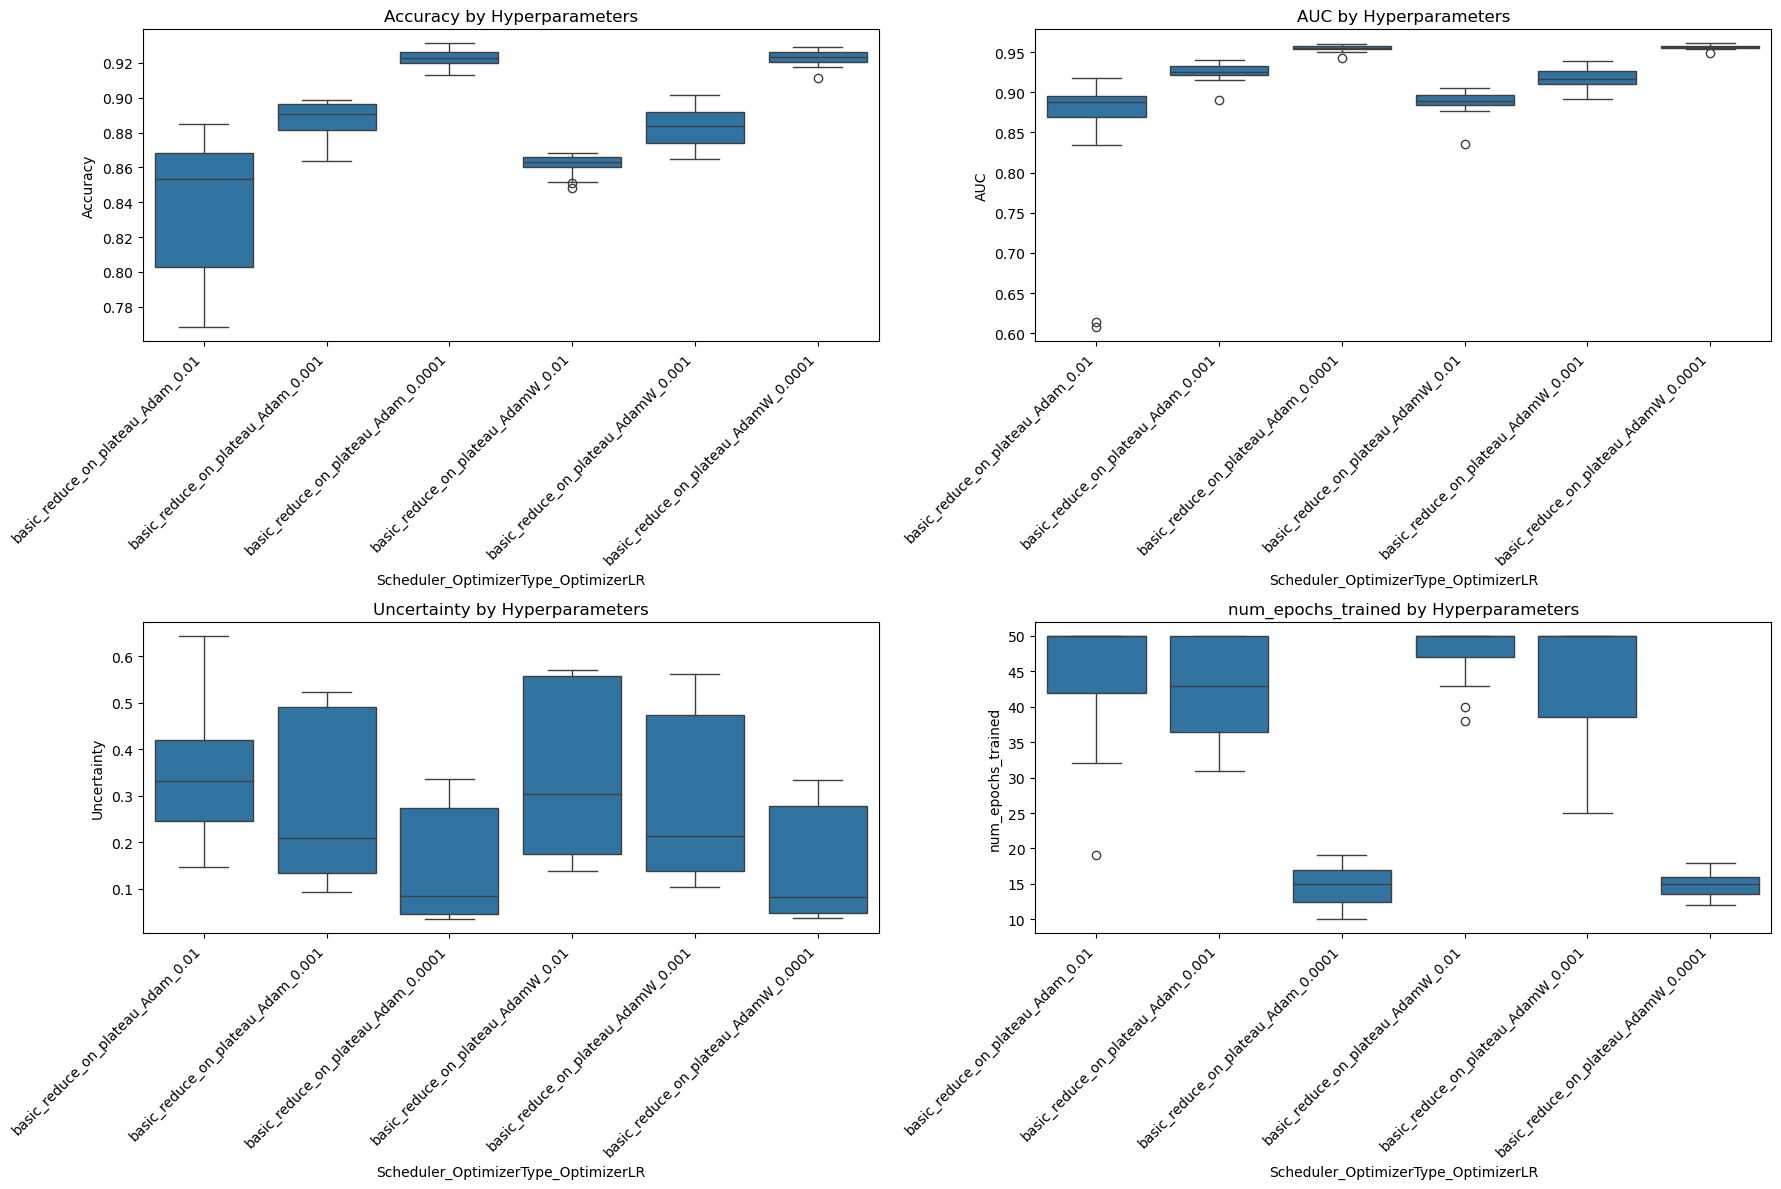

In [12]:
# Filter the DataFrame to exclude rows with LossFunction == 'ReverseCrossEntropy'
filtered_df1 = df[df['Model'] == 'R34']
filtered_df1 = filtered_df1[filtered_df1['Augmentation'] == 'basic']
filtered_df = filtered_df1[filtered_df1['LossFunction'] != 'RCEL']

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your complete DataFrame; create a copy called df_filter.
filtered_df = filtered_df.copy()
# Create a new column that combines Scheduler, OptimizerType, and OptimizerLR
# Note: Convert OptimizerLR to string so the concatenation works as expected.
filtered_df['Hyperparam'] = (
    filtered_df['Augmentation'] + '_' +
    filtered_df['Scheduler'] + '_' +
    filtered_df['OptimizerType'] + '_' +
    filtered_df['OptimizerLR'].astype(str)
)

# Define the list of metrics to plot
metrics = ['Accuracy', 'AUC', 'Uncertainty', 'num_epochs_trained']

# Create a 2x2 grid for the box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    sns.boxplot(x='Hyperparam', y=metric, data=filtered_df, ax=ax)
    ax.set_title(f"{metric} by Hyperparameters")
    ax.set_xlabel("Scheduler_OptimizerType_OptimizerLR")
    ax.set_ylabel(metric)
    # Rotate x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [49]:
filtered_df1 = df[df['Model'] == 'R50']

In [50]:
filtered_df1.shape[0]/5

97.4

In [5]:
import os
lenth = 0
for image_input in [224, 512, 1024]:
    for augmentation_type in ['none']:
        for scheduler_type in ['reduce_on_plateau', 'cosine_warm_up']:
            for criterion_weight in ['None', 'equal_weight', 'weight10']:
                for optimizer_type in ['Adam', 'AdamW']:
                    for optimizer_lr in [0.01, 0.001, 0.0001]:
                        # Build the base path using the current hyperparameters
                        base_path = (
                            f"/data/mdaouk/Repo2/metrics/image_size_{image_input}/augmentation_{augmentation_type}/"
                            f"scheduler_type_{scheduler_type}/criterion_weight_{criterion_weight}/"
                            f"optimizer_type_{optimizer_type}/optimizer_lr_{optimizer_lr}"
                        )
                        for loss_function_index, loss_function in enumerate(['CrossEntropyLoss', 'TotalCrossEntropyLoss', 'FocalLoss']):
                            loss_function_title = ['Cross Entropy Loss', 'Reverse CrossEntropy Loss', 'Total CrossEntropy Loss', 'Focal Loss']
                            for model_index, model in enumerate(['Vision']):
                                model_title = ['R18', 'R34', 'R50', 'R101', '152','D121', 'D169', 'D201', 'Vit']
                                metrics_list = []
                                for fold in range(1, 6):
                                    # Construct the full metric file path for the current configuration
                                    metric_path = f"{base_path}/loss_function_{loss_function}/model_{model}/training_dict_fold{fold}.json"
                                    
                                    # If the file does not exist, skip this iteration
                                    if not os.path.exists(metric_path):
                                        continue
                                    lenth += 1
print(lenth/5)

108.0


In [8]:
import os
lenth = 0
for image_input in [224]:
    for augmentation_type in ['none']:
        for scheduler_type in ['reduce_on_plateau']:
            for criterion_weight in ['None']:
                for optimizer_type in ['Adam']:
                    for optimizer_lr in [0.0001]:
                        # Build the base path using the current hyperparameters
                        base_path = (
                            f"/data/mdaouk/Repo2/metrics/image_size_{image_input}/augmentation_{augmentation_type}/"
                            f"scheduler_type_{scheduler_type}/criterion_weight_{criterion_weight}/"
                            f"optimizer_type_{optimizer_type}/optimizer_lr_{optimizer_lr}"
                        )
                        for loss_function_index, loss_function in enumerate(['CrossEntropyLoss']):
                            loss_function_title = ['Cross Entropy Loss', 'Reverse CrossEntropy Loss', 'Total CrossEntropy Loss', 'Focal Loss']
                            for model_index, model in enumerate(['Resnet18']):
                                model_title = ['R18', 'R34', 'R50', 'R101', '152','D121', 'D169', 'D201', 'Vit']
                                metrics_list = []
                                for fold in range(1, 6):
                                    # Construct the full metric file path for the current configuration
                                    metric_path = f"{base_path}/loss_function_{loss_function}/model_{model}/training_dict_fold{fold}.json"
                                    
                                    # If the file does not exist, skip this iteration
                                    if not os.path.exists(metric_path):
                                        continue
                                    lenth += 1
print(lenth/5)

import json
with open(metric_path, 'r') as f:
    try:
        data = json.load(f)
    except json.decoder.JSONDecodeError as e:
        print(f"Error decoding JSON in {metric_path}: {e}")
        

1.0


In [9]:
data.keys()

dict_keys(['fold_loss', 'train_accuracies', 'val_losses', 'val_accuracies', 'precisions', 'recalls', 'f1_scores', 'aucs', 'confusion_matrices', 'gradient_norms', 'epoch_times', 'num_epochs_trained', 'all_testing_dict'])

In [16]:
len(data['all_testing_dict']['all_softmax_iterations'][0])

2

In [25]:
for i in range(50):
    print(data['all_testing_dict']['all_softmax_iterations'][i][100])

[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493491158e-05]
[0.9999719858169556, 2.799796493